Problem Statement:
You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.

Customer_churn Dataset:
The details regarding this ‘customer_churn’ dataset are present in the data dictiona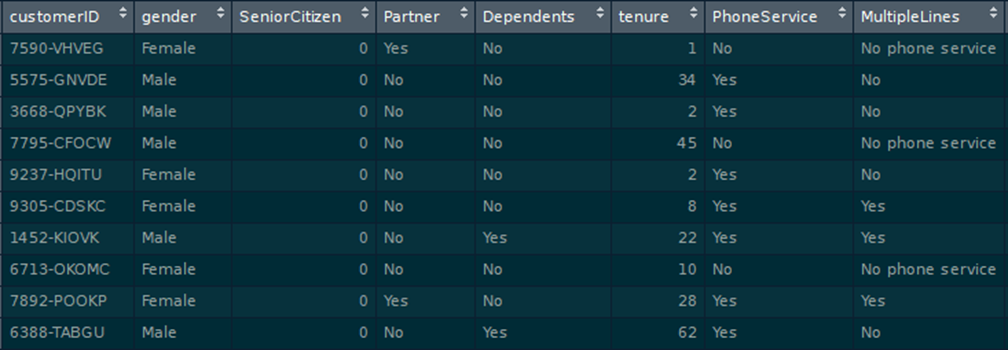!r









Lab Environment: Anaconda

Domain: Telecom

Tasks To Be Performed:

1.	Data Manipulation:
●	Extract the 5th column and store it in ‘customer_5’
●	Extract the 15th column and store it in ‘customer_15’
●	Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
●	Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the resul
●	Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
●	Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
●	Get the count of different levels from the ‘Churn’ column
t in ‘customer_total_tenure’


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_churn.csv')

# 1. Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:, 4]  # Column indexing starts at 0

# 2. Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:, 14]

# 3. Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender'] == 'Male') & 
                            (df['SeniorCitizen'] == 1) & 
                            (df['PaymentMethod'] == 'Electronic check')]

# 4. Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

# 5. Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & 
                  (df['PaymentMethod'] == 'Mailed check') & 
                  (df['Churn'] == 'Yes')]

# 6. Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
customer_333 = df.sample(n=333)

# 7. Get the count of different levels from the ‘Churn’ column
churn_count = df['Churn'].value_counts()

# Display outputs
print("Customer 5 Column:\n", customer_5.head())
print("Customer 15 Column:\n", customer_15.head())
print("Senior Male Electronic Check:\n", senior_male_electronic.head())
print("Customer Total Tenure:\n", customer_total_tenure.head())
print("Two Mail Yes:\n", two_mail_yes.head())
print("Customer 333 Random Samples:\n", customer_333.head())
print("Churn Count:\n", churn_count)


2.	Data Visualization:
●	Build a bar-plot for the ’InternetService’ column:
a.	Set x-axis label to ‘Categories of Internet Service’
b.	Set y-axis label to ‘Count of Categories’
c.	Set the title of plot to be ‘Distribution of Internet Service’
d.	Set the color of the bars to be ‘orange’

●	Build a histogram for the ‘tenure’ column:
a.	Set the number of bins to be 30
b.	Set the color of the bins to be ‘green’
c.	Assign the title ‘Distribution of tenure’

●	Build	a	scatter-plot	between	‘MonthlyCharges’	and	‘tenure’.	Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a.	Assign the points a color of ‘brown’
b.	Set the x-axis label to ‘Tenure of customer’
c.	Set the y-axis label to ‘Monthly Charges of customer’
d.	Set the title to ‘Tenure vs Monthly Charges’
e.	Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
f.	‘Contract’ on the x-axis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('customer_churn.csv')

# 1. Bar-plot for 'InternetService' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Categories of Internet Service')  # x-axis label
plt.ylabel('Count of Categories')             # y-axis label
plt.title('Distribution of Internet Service') # Title
plt.show()

# 2. Histogram for the 'tenure' column
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=30, color='green')  # Bins = 30 and color = green
plt.xlabel('Tenure')                           # x-axis label
plt.ylabel('Frequency')                        # y-axis label
plt.title('Distribution of Tenure')            # Title
plt.show()

# 3. Scatter plot between 'MonthlyCharges' and 'tenure'
plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')  # Scatter color = brown
plt.xlabel('Tenure of customer')                                # x-axis label
plt.ylabel('Monthly Charges of customer')                       # y-axis label
plt.title('Tenure vs Monthly Charges')                          # Title
plt.show()

# 4. Box-plot between 'tenure' and 'Contract'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')        # x-axis label
plt.ylabel('Tenure')          # y-axis label
plt.title('Tenure vs Contract')  # Title
plt.show()


3.	Linear Regression:
●	Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
a.	Divide the dataset into train and test sets in 70:30 ratio.
b.	Build the model on train set and predict the values on test set
c.	After predicting the values, find the root mean square error
d.	Find out the error in prediction & store the result in ‘error’
e.	Find the root mean square error


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('customer_churn.csv')

# 1. Prepare the data
X = df[['tenure']]               # Independent variable
y = df['MonthlyCharges']         # Dependent variable

# 2. Divide the dataset into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build the model on the train set
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values on the test set
y_pred = model.predict(X_test)

# 5. Find the root mean square error
error = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
print("Root Mean Square Error:", error)

# 6. Store the prediction error in 'error'
prediction_error = y_test - y_pred
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': prediction_error})

print(error_df.head())  # Display the first few rows of the error DataFrame


4.Logistic Regression:
●	Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
a.	Divide the dataset in 65:35 ratio
b.	Build the model on train set and predict the values on test set
c.	Build the confusion matrix and get the accuracy score
d.	Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
e.	Divide the dataset in 80:20 ratio
f.	Build the model on train set and predict the values on test set
g.	Build the confusion matrix and get the accuracy score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('customer_churn.csv')

# 1. Simple Logistic Regression
# a. Divide the dataset in 65:35 ratio
X_simple = df[['MonthlyCharges']]
y_simple = df['Churn']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.35, random_state=42
)

# b. Build the model on train set and predict the values on test set
model_simple = LogisticRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)

# c. Build the confusion matrix and get the accuracy score
confusion_simple = confusion_matrix(y_test_simple, y_pred_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

print("Simple Logistic Regression:")
print("Confusion Matrix:\n", confusion_simple)
print("Accuracy Score:", accuracy_simple)

# 2. Multiple Logistic Regression
# d. Build a multiple logistic regression model with 'tenure' and 'MonthlyCharges'
X_multiple = df[['tenure', 'MonthlyCharges']]
y_multiple = df['Churn']

# e. Divide the dataset in 80:20 ratio
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y_multiple, test_size=0.20, random_state=42
)

# f. Build the model on train set and predict the values on test set
model_multiple = LogisticRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)
y_pred_multiple = model_multiple.predict(X_test_multiple)

# g. Build the confusion matrix and get the accuracy score
confusion_multiple = confusion_matrix(y_test_multiple, y_pred_multiple)
accuracy_multiple = accuracy_score(y_test_multiple, y_pred_multiple)

print("\nMultiple Logistic Regression:")
print("Confusion Matrix:\n", confusion_multiple)
print("Accuracy Score:", accuracy_multiple)


5.Decision Tree:
●	Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
a.	Divide the dataset in 80:20 ratio
b.	Build the model on train set and predict the values on test set
c.	Build the confusion matrix and calculate the accuracy



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('customer_churn.csv')

# a. Divide the dataset in 80:20 ratio
X = df[['tenure']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# b. Build the model on train set and predict the values on test set
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# c. Build the confusion matrix and calculate the accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Accuracy Score:", accuracy)


6.	Random Forest:
a.	Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
i.	Divide the dataset in 70:30 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and calculate the accuracy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('customer_churn.csv')

# a.i. Divide the dataset in 70:30 ratio
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# a.ii. Build the model on train set and predict the values on test set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# a.iii. Build the confusion matrix and calculate the accuracy
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Accuracy Score:", accuracy)
